In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [54]:

n = 1000 #точек 
c = 3. * 10** (8) # м/с


In [55]:
dt = 0.05
dz=0.000625
z=1.
t = 20.
Nz = z / dz
Nt = 2 * t / dt

In [56]:
T0=20.
def impulse1(t):
    return  np.e ** (-1. * t ** 2 / (2. * T0 ** 2))

In [57]:
z_array = np.arange(0, z, dz)
t_array = np.arange(-20, 20, dt)

In [58]:
q = np.zeros((len(z_array), len(t_array)), dtype=complex)

first_layer = []
for t_i in t_array:
    res = impulse1(t_i)
    first_layer.append(res)
q[0] = first_layer


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


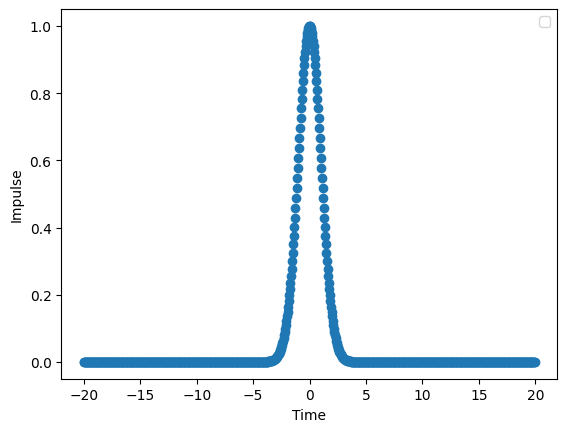

In [59]:
graph = []
for q_i in q[0]:
    graph.append(abs(q_i))

plt.scatter(t_array, graph)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()


In [60]:
for i in range(0, len(z_array)-1):
    for j in range(0, len(t_array)):
        if i == 0:
            if j == 0:
                q[i + 1][j] = 0 - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j + 1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
            else:
                if j == len(t_array) - 1:
                    q[i + 1][j] = 0 - 1j *((2 * dz/(dt)**2) *(q[i][j - 1] -2 * q[i][j] + q[i][j - 1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
                else:
                    q[i + 1][j] = 0 - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
        else:
            if j == 0:
                q[i + 1][j] = q[i - 1][j] - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j + 1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
            else:
                if j == len(t_array) - 1:
                    q[i + 1][j] = q[i - 1][j] - 1j *((2 * dz/(dt)**2) *(q[i][j - 1] -2 * q[i][j] + q[i][j - 1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
                else:
                    q[i + 1][j] = q[i - 1][j] - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))


C:\Users\dellx\AppData\Local\Temp\ipykernel_27092\3333604405.py:18: RuntimeWarning: overflow encountered in scalar multiply
  q[i + 1][j] = q[i - 1][j] - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
C:\Users\dellx\AppData\Local\Temp\ipykernel_27092\3333604405.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  q[i + 1][j] = q[i - 1][j] - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))
C:\Users\dellx\AppData\Local\Temp\ipykernel_27092\3333604405.py:18: RuntimeWarning: overflow encountered in scalar power
  q[i + 1][j] = q[i - 1][j] - 1j *((2 * dz/(dt)**2) *(q[i][j+1] -2 * q[i][j] + q[i][j-1] - 4 * dz * np.abs(q[i][j] )**2 * q[i][j]))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


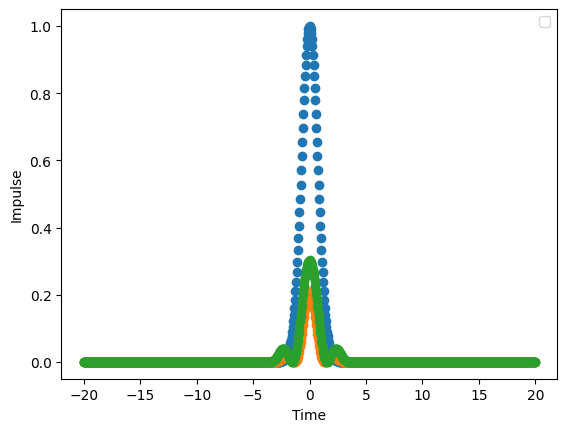

In [61]:
graph1 = []
for q_i in q[0]:
    graph1.append(abs(q_i)**2)

graph2 = []
for q_i in q[499]:
    graph2.append(abs(q_i) ** 2)  

graph3 = []
for q_i in q[799]:
    graph3.append(abs(q_i) ** 2)   

plt.scatter(t_array, graph1)
plt.scatter(t_array, graph2)
plt.scatter(t_array, graph3)
#plt.scatter(t, impulse3)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()